In [1]:
! pip install geopandas

In [2]:
! pip install haversine

In [3]:
# 한글폰트(나눔) 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [4]:
import pandas as pd
import folium
from folium import plugins
from shapely.geometry import Point
from haversine import haversine
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import pathlib
import os

from sklearn.preprocessing import MinMaxScaler


# 한글깨짐 방지코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

plt.rc('font', family='NanumBarunGothic')

In [114]:
path = "/content/drive/MyDrive/compas/data/"
save_path = "/content/drive/MyDrive/compas/"

In [6]:
# load data
주정차단속 = pd.read_csv(path+'1.오산시_주정차단속(2018~2020).csv',encoding="utf-8")
어린이교통사고_격자 = gpd.read_file(path+'2.오산시_어린이교통사고_격자 - 복사본.geojson', encoding="utf-8")
차량등록현황_격자 = gpd.read_file(path+'3.오산시_차량등록현황_격자.geojson', encoding="utf-8")
거주인구격자_총인구 = gpd.read_file(path+'4.오산시_연령별_거주인구격자(총인구).geojson', encoding="utf-8")
거주인구격자_유소년 = gpd.read_file(path+'5.오산시_연령별_거주인구격자(유소년).geojson', encoding="utf-8")
거주인구격자_생산가능 = gpd.read_file(path+'6.오산시_연령별_거주인구격자(생산가능인구).geojson', encoding="utf-8")
거주인구격자_고령 = gpd.read_file(path+'7.오산시_연령별_거주인구격자(고령).geojson', encoding="utf-8")
유동인구 = pd.read_csv(path+'8.오산시_유동인구(2019) - 복사본.csv',encoding="utf-8")
어린이보호구역 = pd.read_csv(path+'9.오산시_어린이보호구역.csv',encoding="utf-8")
학교위치정보 = pd.read_csv(path+'10.오산시_학교위치정보.csv',encoding="utf-8")
초등학교_통학구 = gpd.read_file(path+'11.오산시_초등학교_통학구.geojson', encoding="utf-8")
중학교_학군 = gpd.read_file(path+'12.오산시_중학교_학군.geojson', encoding="utf-8")
어린이집_유치원현황 = pd.read_csv(path+'13.오산시_어린이집_유치원현황.csv',encoding="utf-8")
기상데이터 = pd.read_csv(path+'14.오산시_기상데이터(2010~2019).csv',encoding="utf-8")
무인교통단속카메라 = pd.read_csv(path+'15.오산시_무인교통단속카메라.csv',encoding="utf-8")
도로안전표지 = pd.read_csv(path+'16.오산시_도로안전표지표준데이터.csv',encoding="utf-8")
횡단보도 = gpd.read_file(path+'17.오산시_횡단보도.geojson', encoding="utf-8")
과속방지턱 = pd.read_csv(path+'18.오산시_과속방지턱표준데이터.csv',encoding="utf-8")
신호등 = gpd.read_file(path+'19.오산시_신호등.geojson', encoding="utf-8")
CCTV설치현황 = pd.read_csv(path+'20.오산시_CCTV설치현황.csv',encoding="utf-8")
인도 = gpd.read_file(path+'21.오산시_인도.geojson', encoding="utf-8")
버스정류장 = pd.read_csv(path+'22.오산시_버스정류장.csv',encoding="utf-8")
상세도로망 = gpd.read_file(path+'23.오산시_상세도로망_LV6.geojson', encoding="utf-8")
시간대별_추정교통량 = pd.read_csv(path+'24.평일_전일,시간대별_오산시_추정교통량_Level6.csv',encoding="utf-8")
혼잡빈도강도 = pd.read_csv(path+'25.평일_전일_오산시_혼잡빈도강도_Level6.csv',encoding="utf-8")
혼잡시간강도 = pd.read_csv(path+'26.평일_전일_오산시_혼잡시간강도_Level6.csv',encoding="utf-8")
도로명주소_건물 = gpd.read_file(path+'27.오산시_도로명주소_건물.geojson', encoding="utf-8")
건물연면적_격자 = gpd.read_file(path+'28.오산시_건물연면적_격자.geojson', encoding="utf-8")
체육시설현황 = pd.read_csv(path+'29.오산시_체육시설현황.csv',encoding="utf-8")
학원_및_교습소_현황 = pd.read_csv(path+'30.오산시_학원 및 교습소 현황.csv',encoding="utf-8")
법정경계_시군구 = gpd.read_file(path+'31.오산시_법정경계(시군구).geojson', encoding="utf-8")
행정경계_읍면동 = gpd.read_file(path+'32.오산시_행정경계(읍면동).geojson', encoding="utf-8")
법정경계_읍면동 = gpd.read_file(path+'33.오산시_법정경계(읍면동).geojson', encoding="utf-8")
지적도 = gpd.read_file(path+'34.오산시_지적도.geojson', encoding="utf-8")
코드정의서 =  pd.read_excel(path+'35.코드정의서.xlsx')

In [7]:
# 지도 고정값
center =[37.1515948, 127.0359805]
zoom =13

In [8]:
# 동별 경계, 기존 어린이보호구역 포함된 지도 우선 생성
m = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    법정경계_읍면동,
    name = "동 경계",
    style_function=lambda feature: {
        'color': '#000000',
        'weight': 2,
        'opacity':0.2,
    }
).add_to(m)

for line in 어린이보호구역.iloc:
    [lng,lat] = line[-2:]
    folium.Circle(
    location = [lat,lng],
    radius=300,
    stroke=False,
    fill=True,
    fill_color='green',
    fill_opacity=0.6).add_to(m)

In [9]:
# m

# 오산시 무인교통단속카메라 설치 후보 구역을 찾아보자

In [10]:
무인교통단속카메라.head(10)

,도로노선명,도로노선방향,설치장소명,단속구분,설치위치_경도,설치위치_위도
0,궐리사로,양방향,궐동-법원앞(법원사거리),불법주정차,127.059357,37.159313
1,역광장로,양방향,원동-오산역광장,불법주정차,127.067796,37.145409
2,궐리사로,양방향,궐동-제일하이빌,불법주정차,127.062386,37.159198
3,궐리사로,양방향,궐리사 주차장 앞,불법주정차,127.061920,37.158559
4,운암로,양방향,부산동-운천초교 입구,불법주정차,127.077991,37.156216
5,오산로,양방향,원동-컨벤션웨딩홀,불법주정차,127.068316,37.143547
6,경기대로,양방향,오산동-KT후문,불법주정차,127.074178,37.153804
7,대원로,양방향,원동-국민은행,불법주정차,127.075498,37.145264
8,양산로,양방향,양산동-한신대 앞 사거리,불법주정차,127.022971,37.196268
9,경기대로,양방향,원동 농협앞 건너편,불법주정차,127.073774,37.137997


In [11]:
# 무인교통단속카메라는 모두 불법주정차 단속 카메라임을 확인해볼 수 있다.
무인교통단속카메라['단속구분'].value_counts()
# -> 과속단속카메라가 없어서 의외였음...

불법주정차    112
Name: 단속구분, dtype: int64

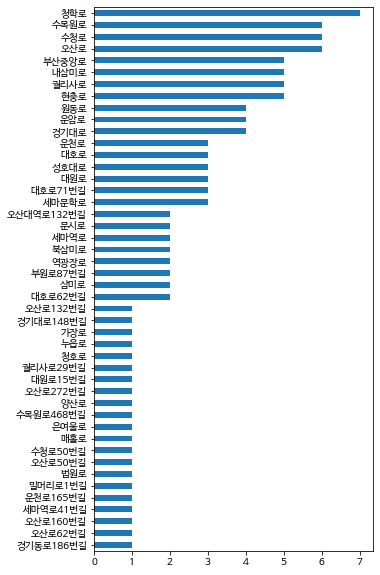

In [12]:
# 무인교통단속카메라가 설치된 도로노선명들을 시각화함
무인교통단속카메라['도로노선명'].value_counts(ascending=True).plot(kind='barh', figsize=(5,10))
plt.show()

In [33]:
# 무인교통단속카메라가 어린이보호구역 안에 있는지 확인
def check_schoolzone(row):
  global 어린이보호구역
  
  for row2 in 어린이보호구역.iloc:
    lat = row2['보호구역_위도']
    lng = row2['보호구역_경도']
    
    if haversine((lat, lng), (row['설치위치_위도'], row['설치위치_경도']), unit='m') <= 300:
      return True
  return False

무인교통단속카메라['schoolzone']=무인교통단속카메라.apply(check_schoolzone, axis=1)

In [34]:
무인교통단속카메라.head()

,도로노선명,도로노선방향,설치장소명,단속구분,설치위치_경도,설치위치_위도,schoolzone,marker_color
0,궐리사로,양방향,궐동-법원앞(법원사거리),불법주정차,127.059357,37.159313,True,blue
1,역광장로,양방향,원동-오산역광장,불법주정차,127.067796,37.145409,False,orange
2,궐리사로,양방향,궐동-제일하이빌,불법주정차,127.062386,37.159198,True,blue
3,궐리사로,양방향,궐리사 주차장 앞,불법주정차,127.061920,37.158559,True,blue
4,운암로,양방향,부산동-운천초교 입구,불법주정차,127.077991,37.156216,True,blue


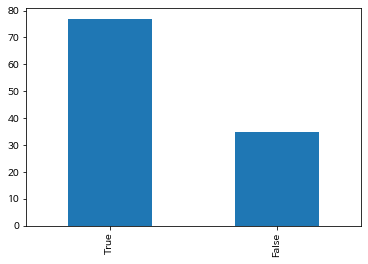

In [26]:
# 어린이보호구역 안에 있는 무인교통단속카메라 갯수 확인
무인교통단속카메라['schoolzone'].value_counts().plot(kind='bar')
plt.show()

In [16]:
# 무인교통단속카메라가 스쿨존 안에 있으면 파란색, 아니면 주황색으로 카테고리화
schoolzone_cmap={True:'blue',
                 False:'orange'}
무인교통단속카메라['marker_color']=무인교통단속카메라['schoolzone'].map(schoolzone_cmap)

In [17]:
# 무인교통단속카메라 위치를 지도에 추가
for i in range(len(무인교통단속카메라)):
    folium.Marker(
    location = 무인교통단속카메라.loc[i, ['설치위치_위도', '설치위치_경도']],
    popup = 무인교통단속카메라.loc[i, '설치장소명'],
    # radius = 15,
    icon=folium.Icon(color=무인교통단속카메라.loc[i, 'marker_color'], icon='star')
    ).add_to(m)

In [18]:
# 어린이교통사고가 2회이상 발생한 격자를 지도에 추가
acc2 = 어린이교통사고_격자[어린이교통사고_격자['accident_cnt'] >= 2 ]
folium.GeoJson(
    acc2['geometry'],    
    style_function=lambda feature: {
        'color': 'darkred',
        'weight': 3,
        'opacity':0.7
        }
).add_to(m)

In [19]:
m

# 어린이보호구역별로 무인교통단속카메라 갯수 카운트



In [22]:
어린이보호구역.head(3)

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도
0,특수학교,성심학교,N,0,25,127.017521,37.176762
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197


In [23]:
무인교통단속카메라.head(3)

,도로노선명,도로노선방향,설치장소명,단속구분,설치위치_경도,설치위치_위도,schoolzone,marker_color
0,궐리사로,양방향,궐동-법원앞(법원사거리),불법주정차,127.059357,37.159313,True,blue
1,역광장로,양방향,원동-오산역광장,불법주정차,127.067796,37.145409,False,orange
2,궐리사로,양방향,궐동-제일하이빌,불법주정차,127.062386,37.159198,True,blue


In [31]:
# 각 어린이보호구역에 있는 무인교통단속카메라 갯수 카운트
def count_camera(row):
  cnt=0
  global 무인교통단속카메라

  for row2 in 무인교통단속카메라.iloc:
    lat = row2['설치위치_위도']
    lng = row2['설치위치_경도']
    
    if haversine((lat, lng), (row['보호구역_위도'], row['보호구역_경도']), unit='m') <= 300:
      cnt+=1
  return cnt

어린이보호구역['cnt_camera']=어린이보호구역.apply(count_camera, axis=1)

In [32]:
어린이보호구역.head(5)

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,cnt_camera
0,특수학교,성심학교,N,0,25,127.017521,37.176762,0
1,초등학교,가수초등학교,Y,1,12,127.047957,37.148103,0
2,초등학교,광성초등학교,Y,2,12,127.039709,37.184197,2
3,초등학교,대호초등학교,Y,3,12,127.057889,37.159106,2
4,초등학교,매홀초등학교,Y,2,6,127.063282,37.162749,2


In [48]:
# 어린이보호구역별 무인교통단속카메라 설치대수 카운트
어린이보호구역['cnt_camera'].value_counts(sort=False)

0    31
1    16
2    26
3     8
4     5
5     5
Name: cnt_camera, dtype: int64

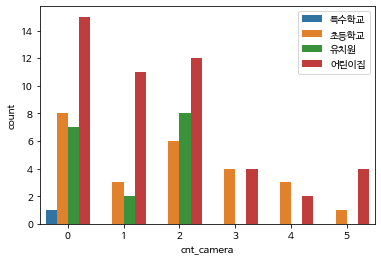

In [61]:
fig2=sns.countplot(x='cnt_camera', data=어린이보호구역, hue='시설종류')
fig2.legend(loc='upper right')
plt.show()

In [119]:
plt.savefig(save_path+'어린이보호구역+무인교통단속카메라.png')

<Figure size 432x288 with 0 Axes>

In [56]:
# 동별 경계, 기존 어린이보호구역 포함된 지도 우선 생성
m2 = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    법정경계_읍면동,
    name = "동 경계",
    style_function=lambda feature: {
        'color': '#000000',
        'weight': 2,
        'opacity':0.2,
    }
).add_to(m2)

for line in 어린이보호구역[어린이보호구역['cnt_camera']==0].iloc:
  lat = line['보호구역_위도']
  lng = line['보호구역_경도']
  folium.Circle(
      location=[lat, lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='red',
      fill_opacity=0.6,
      tooltip=line['시설명']
  ).add_to(m2)

for line in 어린이보호구역[어린이보호구역['cnt_camera']==1].iloc:
  lat = line['보호구역_위도']
  lng = line['보호구역_경도']
  folium.Circle(
      location=[lat, lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='orange',
      fill_opacity=0.6,
      tooltip=line['시설명']
  ).add_to(m2)

for line in 어린이보호구역[어린이보호구역['cnt_camera']==2].iloc:
  lat = line['보호구역_위도']
  lng = line['보호구역_경도']
  folium.Circle(
      location=[lat, lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='yellow',
      fill_opacity=0.6,
      tooltip=line['시설명']
  ).add_to(m2)

for line in 어린이보호구역[어린이보호구역['cnt_camera']==3].iloc:
  lat = line['보호구역_위도']
  lng = line['보호구역_경도']
  folium.Circle(
      location=[lat, lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='green',
      fill_opacity=0.6,
      tooltip=line['시설명']
  ).add_to(m2)

for line in 어린이보호구역[어린이보호구역['cnt_camera']==4].iloc:
  lat = line['보호구역_위도']
  lng = line['보호구역_경도']
  folium.Circle(
      location=[lat, lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='blue',
      fill_opacity=0.6,
      tooltip=line['시설명']
  ).add_to(m2)

for line in 어린이보호구역[어린이보호구역['cnt_camera']==5].iloc:
  lat = line['보호구역_위도']
  lng = line['보호구역_경도']
  folium.Circle(
      location=[lat, lng],
      radius=300,
      stroke=False,
      fill=True,
      fill_color='purple',
      fill_opacity=0.6,
      tooltip=line['시설명']
  ).add_to(m2)

In [57]:
m2

In [117]:
m2.save(save_path+'어린이보호구역+무인교통단속카메라 설치대수 0-5.html')

# 어린이보호구역별로 불법주정차단속 횟수 카운트

In [72]:
주정차단속.head()

,단속일자,단속위치,행정구역,스쿨존여부,단속위치_경도,단속위치_위도,단속종류
0,20181101,금암동 여계산로 부근,경기도 오산시 세교동,N,127.043462,37.170237,이동형CCTV단속
1,20181101,세교동 세마역로19번길,경기도 오산시 세교동,N,127.044770,37.181695,이동형CCTV단속
2,20181101,세교동 수목원로 부근,경기도 오산시 양산동,N,127.042200,37.186357,이동형CCTV단속
3,20181101,오산동 오산로272번길 부,경기도 오산시 원동,N,127.071732,37.150557,이동형CCTV단속
4,20181101,오산동 성호대로93번길,경기도 오산시 부산동,N,127.071757,37.150457,이동형CCTV단속


In [78]:
주정차단속.shape

(61701, 7)

In [73]:
주정차단속['단속종류'].value_counts()

고정형CCTV단속    45160
이동형CCTV단속    16541
Name: 단속종류, dtype: int64

In [74]:
주정차단속['스쿨존여부'].value_counts()

N    61624
Y       77
Name: 스쿨존여부, dtype: int64

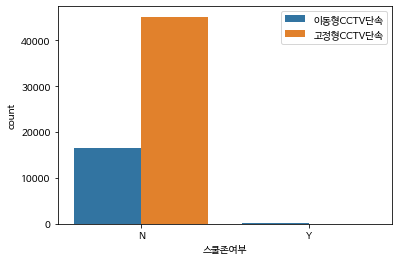

In [75]:
fig3=sns.countplot(x='스쿨존여부', data=주정차단속, hue='단속종류')
fig3.legend(loc='upper right')
plt.show()

In [66]:
주정차단속[주정차단속['스쿨존여부']=='Y'].groupby(['단속위치_위도', '단속위치_경도']).count()

,,단속일자,단속위치,행정구역,스쿨존여부,단속종류
단속위치_위도,단속위치_경도,,,,,
37.132120,127.085178,1,1,1,1,1
37.135030,127.069107,1,1,1,1,1
37.135135,127.068425,1,1,1,1,1
37.138007,127.072137,1,1,1,1,1
37.138025,127.072215,1,1,1,1,1
...,...,...,...,...,...,...
37.159518,127.057375,1,1,1,1,1
37.162433,127.063028,1,1,1,1,1
37.172210,127.058568,1,1,1,1,1


In [79]:
# 각 어린이보호구역에 있는 주정차단속 횟수 카운트
def count_parking(row):
  cnt=0
  global 주정차단속

  for row2 in 주정차단속.iloc:
    lat = row2['단속위치_위도']
    lng = row2['단속위치_경도']
    
    if haversine((lat, lng), (row['보호구역_위도'], row['보호구역_경도']), unit='m') <= 300:
      cnt+=1
  return cnt

어린이보호구역['cnt_parking']=어린이보호구역.apply(count_parking, axis=1)

In [89]:
어린이보호구역.groupby('시설종류').sum()

,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,cnt_camera,cnt_parking
시설종류,,,,,,
어린이집,37,357,6099.060184,1783.420100,75,43088
유치원,16,116,2160.060416,631.695894,18,8677
초등학교,52,275,3176.560748,928.985828,44,20648
특수학교,0,25,127.017521,37.176762,0,0


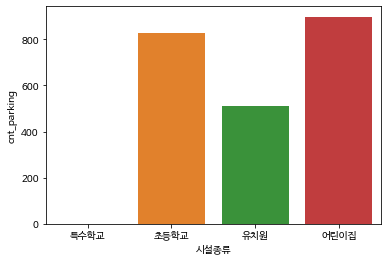

In [84]:
fig4=sns.barplot(x='시설종류', y='cnt_parking', data=어린이보호구역, ci=None)
plt.show()

In [87]:
어린이보호구역.sort_values(by='cnt_parking', ascending=False)[:10]

,시설종류,시설명,CCTV설치여부,CCTV설치대수,보호구역도로폭,보호구역_경도,보호구역_위도,cnt_camera,cnt_parking
88,어린이집,시립은여울어린이집,N,0,20,127.066860,37.170952,2,5990
75,어린이집,늘해랑어린이집,Y,1,7,127.056815,37.161017,5,4877
68,어린이집,그린어린이집,N,0,4,127.069611,37.149776,3,4489
54,어린이집,시립오산어린이집,Y,1,5,127.071138,37.147119,5,4280
7,초등학교,성호초등학교,Y,2,12,127.070953,37.150478,4,4063
65,어린이집,둥근해어린이집,N,0,7,127.056508,37.161239,4,3596
90,어린이집,세교복지타운어린이집,Y,1,15,127.044835,37.177752,5,3021
19,초등학교,금암초등학교,Y,2,6,127.043949,37.178734,4,2869
30,유치원,오산유치원,N,0,3,127.069549,37.152703,2,2812
3,초등학교,대호초등학교,Y,3,12,127.057889,37.159106,2,2801


In [90]:
########################################
# 동별 경계, 기존 어린이보호구역 포함된 지도 우선 생성
m3 = folium.Map(location=center, zoom_start=zoom)

folium.GeoJson(
    법정경계_읍면동,
    name = "동 경계",
    style_function=lambda feature: {
        'color': '#000000',
        'weight': 2,
        'opacity':0.2,
    }
).add_to(m3)

for line in 주정차단속[주정차단속['스쿨존여부']=='Y'].iloc:
  lat = line['단속위치_위도']
  lng = line['단속위치_경도']
  folium.Circle(
      location=[lat, lng],
      radius=30,
      stroke=False,
      fill=True,
      fill_color='red',
      fill_opacity=0.6,
  ).add_to(m3)

In [91]:
m3
# 가수동 지역에 많다!!!!!

In [120]:
m3.save(save_path+'어린이보호구역+스쿨존주정차단속.html')

In [112]:
무인교통단속카메라.head()

,도로노선명,도로노선방향,설치장소명,단속구분,설치위치_경도,설치위치_위도,schoolzone,marker_color
0,궐리사로,양방향,궐동-법원앞(법원사거리),불법주정차,127.059357,37.159313,True,blue
1,역광장로,양방향,원동-오산역광장,불법주정차,127.067796,37.145409,False,orange
2,궐리사로,양방향,궐동-제일하이빌,불법주정차,127.062386,37.159198,True,blue
3,궐리사로,양방향,궐리사 주차장 앞,불법주정차,127.061920,37.158559,True,blue
4,운암로,양방향,부산동-운천초교 입구,불법주정차,127.077991,37.156216,True,blue


In [111]:
주정차단속[주정차단속['스쿨존여부']=='Y']['단속종류'].value_counts()

이동형CCTV단속    77
Name: 단속종류, dtype: int64

In [98]:
df=무인교통단속카메라.copy()
df.rename(columns={'설치위치_경도':'경도', '설치위치_위도':'위도'}, inplace=True)

df2=주정차단속[주정차단속['스쿨존여부']=='Y'].copy()
df2.rename(columns={'단속위치_경도':'경도', '단속위치_위도':'위도'}, inplace=True)

In [107]:
pd.merge(df, df2, on=['경도','위도'])

,도로노선명,도로노선방향,설치장소명,단속구분,경도,위도,schoolzone,marker_color,단속일자,단속위치,행정구역,스쿨존여부,단속종류
